# $Gradient$ $Descent$ $for$ $an$ $Arbitrary$ $Line$

### $Algorithm$ $:$ 
>
- We know the equation of an arbitrary line $y = m*x + c$
>
- Let out cost function (i.e. MSE) be , $E = 1/n * Σ(y_{actual} - y_{pred})^2$
>
- Initially let m = 0 and c = 0 and L be our learning rate. It could be a small value like 0.0001 for good accuracy.
>
- Calculate the partial derivative of the Cost function with respect to m. Let partial derivative of the Cost function with respect to m be $D_{m}$ (With little change in m how much Cost function changes).
>
&emsp; &emsp; <img aria-describedby="caption-attachment-1047743" class="wp-image-1047743" src="https://editor.analyticsvidhya.com/uploads/976048.PNG">
>
- Similarly, calculate the partial derivative with respect to c. Let partial derivative of the Cost function with respect to c be $D_{c}$ (With little change in c how much Cost function changes).
>
&emsp; &emsp; <img aria-describedby="caption-attachment-1047743" class="wp-image-1047743" src="https://editor.analyticsvidhya.com/uploads/978019.PNG">
>
- Now update the current values of m and c using the following equation:
>
&emsp; &emsp; $m = m - L*D_{m}$
>
&emsp; &emsp; $c = c - L*D_{c}$
>
- We will repeat this process until our Cost function is very small (ideally 0).
>

### $Code$ $:$ 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
data_df = pd.read_csv("data.csv", names=["X","Y"])
data_df

,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


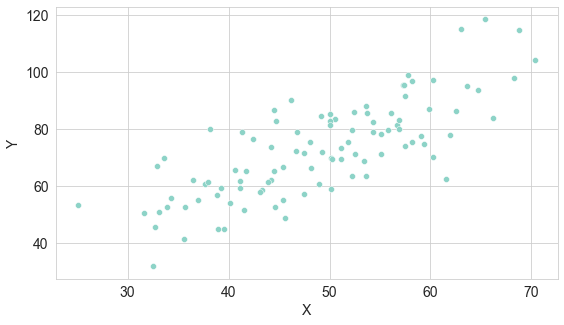

In [3]:
sns.scatterplot(x=data_df["X"],y=data_df["Y"])
plt.show()

In [18]:
# Gradient Descent to find the value of m and c.

# Let initial value of m & c be 0.
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 10000  # The no. of iterations

n = float(len(data_df["X"])) # No. of elements in X

# Performing Gradient Descent 
for i in range(epochs):
    # The current predicted value of Y
    Y_pred = m*data_df["X"] + c

    # Derivative w.r.t. m
    D_m = (-2/n) * sum(data_df["X"] * (data_df["Y"] - Y_pred))
    
    # Derivative w.r.t. c
    D_c = (-2/n) * sum(data_df["Y"] - Y_pred)

    # Updating m & c.
    m = m - L * D_m
    c = c - L * D_c
    
print(f"The value of Slope (m) : {m}")
print(f"The value of Y-intercept (c) : {c}")

The value of Slope (m) : 1.4675440436333025
The value of Y-intercept (c) : 0.6078985997054946


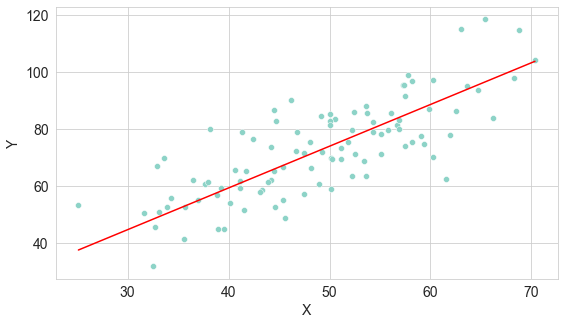

In [19]:
# Making predictions
Y_pred = m*data_df["X"] + c

sns.scatterplot(x = data_df["X"], y = data_df["Y"]) 
sns.lineplot(x = [min(data_df["X"]), max(data_df["X"])], y = [min(Y_pred), max(Y_pred)], color="red")
plt.show()

In [20]:
df = pd.DataFrame()
df["Y_pred"] = Y_pred
df["Y_actual"] = data_df["Y"]
df.corr()

,Y_pred,Y_actual
Y_pred,1.000000,0.773728
Y_actual,0.773728,1.000000


- Both, Y actual & Y predicted is highly correlated, hence we are able to minimize cost function E.